# Introduction

## Task - Overview

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

- <b>CLIENTNUM:</b> Client number Unique identifier for the customer holding the account 
<br>

- <b>Attrition_Flag:</b> Internal event (customer activity) variable if the account is closed then 1 else 0 
<br>
- <b>Customer_Age:</b> Demographic variable -  Customer's Age in Years 
<br>
- <b>Gender: </b>  Demographic variable - M=Male, F=Female 
<br>
- <b>Dependent_count:</b> Demographic variable - Number of dependents
<br>
- <b>Education_Level:</b> Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
<br>
- <b>Maritial_Status:</b> Demographic variable - Married, Single, Divorced, Unknown
<br>
- <b>Income_Category:</b> Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, 
<br>
- <b>Card_Category:</b> Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
<br>
- <b>Months_on_book:</b> Period of relationship with bank

## Import Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, plot_confusion_matrix, SCORERS, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

## Read in Data

In [2]:
df = pd.read_csv('BankCustomerChurn.csv')

In [3]:
pd.set_option('display.max_columns', None)

## Split Data into Train Test

In [4]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=513)

In [6]:
clientNum_Xtrain = X_train['CLIENTNUM']
clientNum_Xtest = X_test['CLIENTNUM']

# EDA

## Exploring Dimensions of Data

In [7]:
X_train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2037,717866133,47,F,2,Graduate,Single,Less than $40K,Blue,36,3,3,3,2677.0,1390,1287.0,0.732,2170,63,0.465,0.519
5129,716739258,43,F,4,Unknown,Single,Less than $40K,Blue,33,5,2,4,1438.3,0,1438.3,0.679,3932,62,0.771,0.000
3745,816263808,47,M,1,Graduate,Single,$80K - $120K,Blue,31,4,1,2,18026.0,755,17271.0,0.931,2760,56,1.000,0.042
1269,751487358,39,F,3,Graduate,Married,Less than $40K,Blue,32,5,6,3,3221.0,0,3221.0,0.678,1765,40,0.600,0.000
5793,719656533,44,M,3,High School,Married,$60K - $80K,Blue,36,6,2,3,2675.0,0,2675.0,0.700,4149,79,0.717,0.000


In [8]:
X_train.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7.088000e+03,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000,7088.000000
mean,7.388685e+08,46.325903,2.341845,35.922968,3.804317,2.337754,2.456970,8570.498744,1176.226157,7394.272587,0.759830,4457.673109,65.154769,0.712049,0.278915
std,3.675499e+07,8.000680,1.296613,7.893534,1.551959,1.020145,1.113109,9019.170568,813.335432,9022.975209,0.221349,3456.334996,23.552323,0.237356,0.276574
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,10.000000,0.000000,530.000000,10.000000,0.000000,0.000000
25%,7.129977e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2557.750000,490.250000,1297.000000,0.631000,2171.000000,45.000000,0.582000,0.027000
50%,7.178266e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4544.500000,1298.500000,3441.500000,0.739000,3919.000000,67.000000,0.700000,0.181000
75%,7.725833e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10946.500000,1793.000000,9681.750000,0.858000,4751.000000,81.000000,0.816000,0.508250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.571000,0.995000


In [9]:
X_train.describe(include='O')

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,7088,7088,7088,7088,7088
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,3761,2172,3315,2523,6619


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7088 entries, 2037 to 660
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7088 non-null   int64  
 1   Customer_Age              7088 non-null   int64  
 2   Gender                    7088 non-null   object 
 3   Dependent_count           7088 non-null   int64  
 4   Education_Level           7088 non-null   object 
 5   Marital_Status            7088 non-null   object 
 6   Income_Category           7088 non-null   object 
 7   Card_Category             7088 non-null   object 
 8   Months_on_book            7088 non-null   int64  
 9   Total_Relationship_Count  7088 non-null   int64  
 10  Months_Inactive_12_mon    7088 non-null   int64  
 11  Contacts_Count_12_mon     7088 non-null   int64  
 12  Credit_Limit              7088 non-null   float64
 13  Total_Revolving_Bal       7088 non-null   int64  
 14  Avg_Op

In [11]:
X_train.isnull().sum()

CLIENTNUM                   0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
discrete = [var for var in X_train.columns if X_train[var].dtypes != 'O' and X_train[var].nunique() < 20 ]
continuous = [var for var in X_train.columns if X_train[var].dtypes != 'O' and var not in discrete ]
categorical = [var for var in X_train.columns if X_train[var].dtypes == 'O']

In [13]:

print(
    f'Discrete Variables: {len(discrete)} \tContinuous Variables: {len(continuous)} \tCategorical Variables: {len(categorical)}'
)

Discrete Variables: 4 	Continuous Variables: 11 	Categorical Variables: 5


<AxesSubplot:>

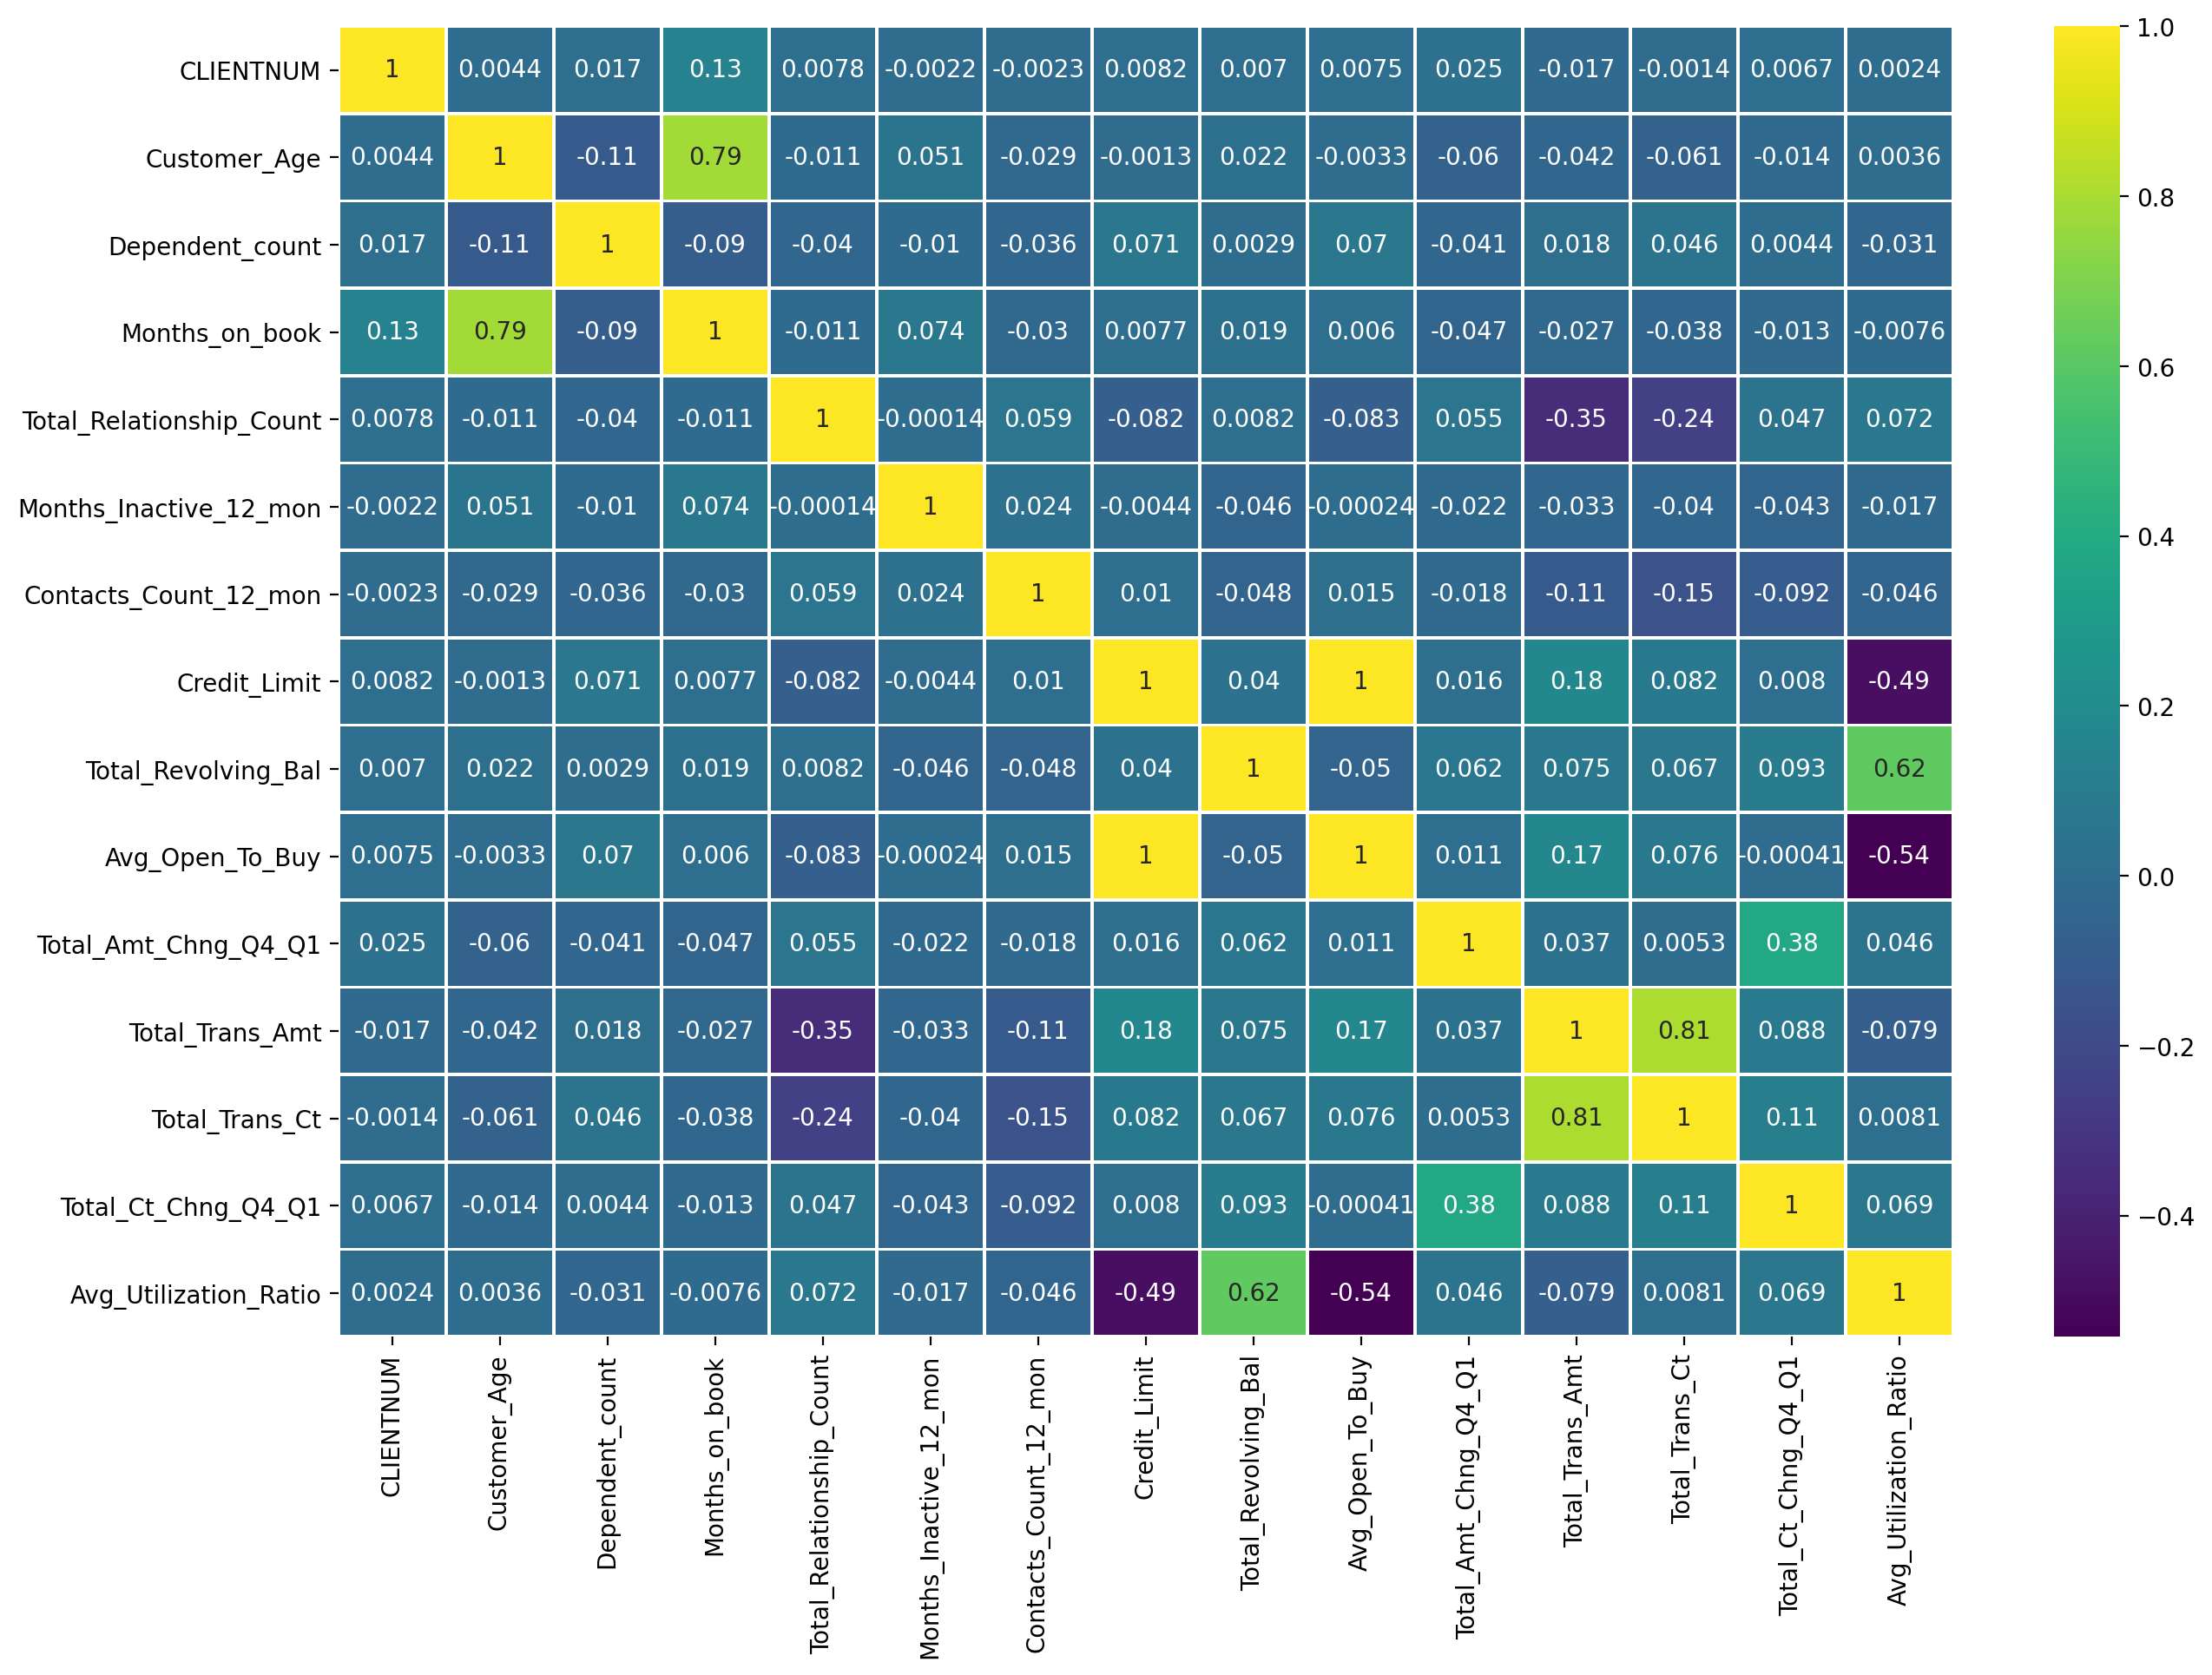

In [14]:
## Understanding Correlation between variables. Target not included. Did not convert to binary yet
plt.figure(figsize=(15, 10), dpi=200)
sns.heatmap(X_train.corr(),
            annot=True,
            linecolor='white',
            linewidths=1,
            cmap='viridis')

## Exploring Distribution of Data

### Discrete 

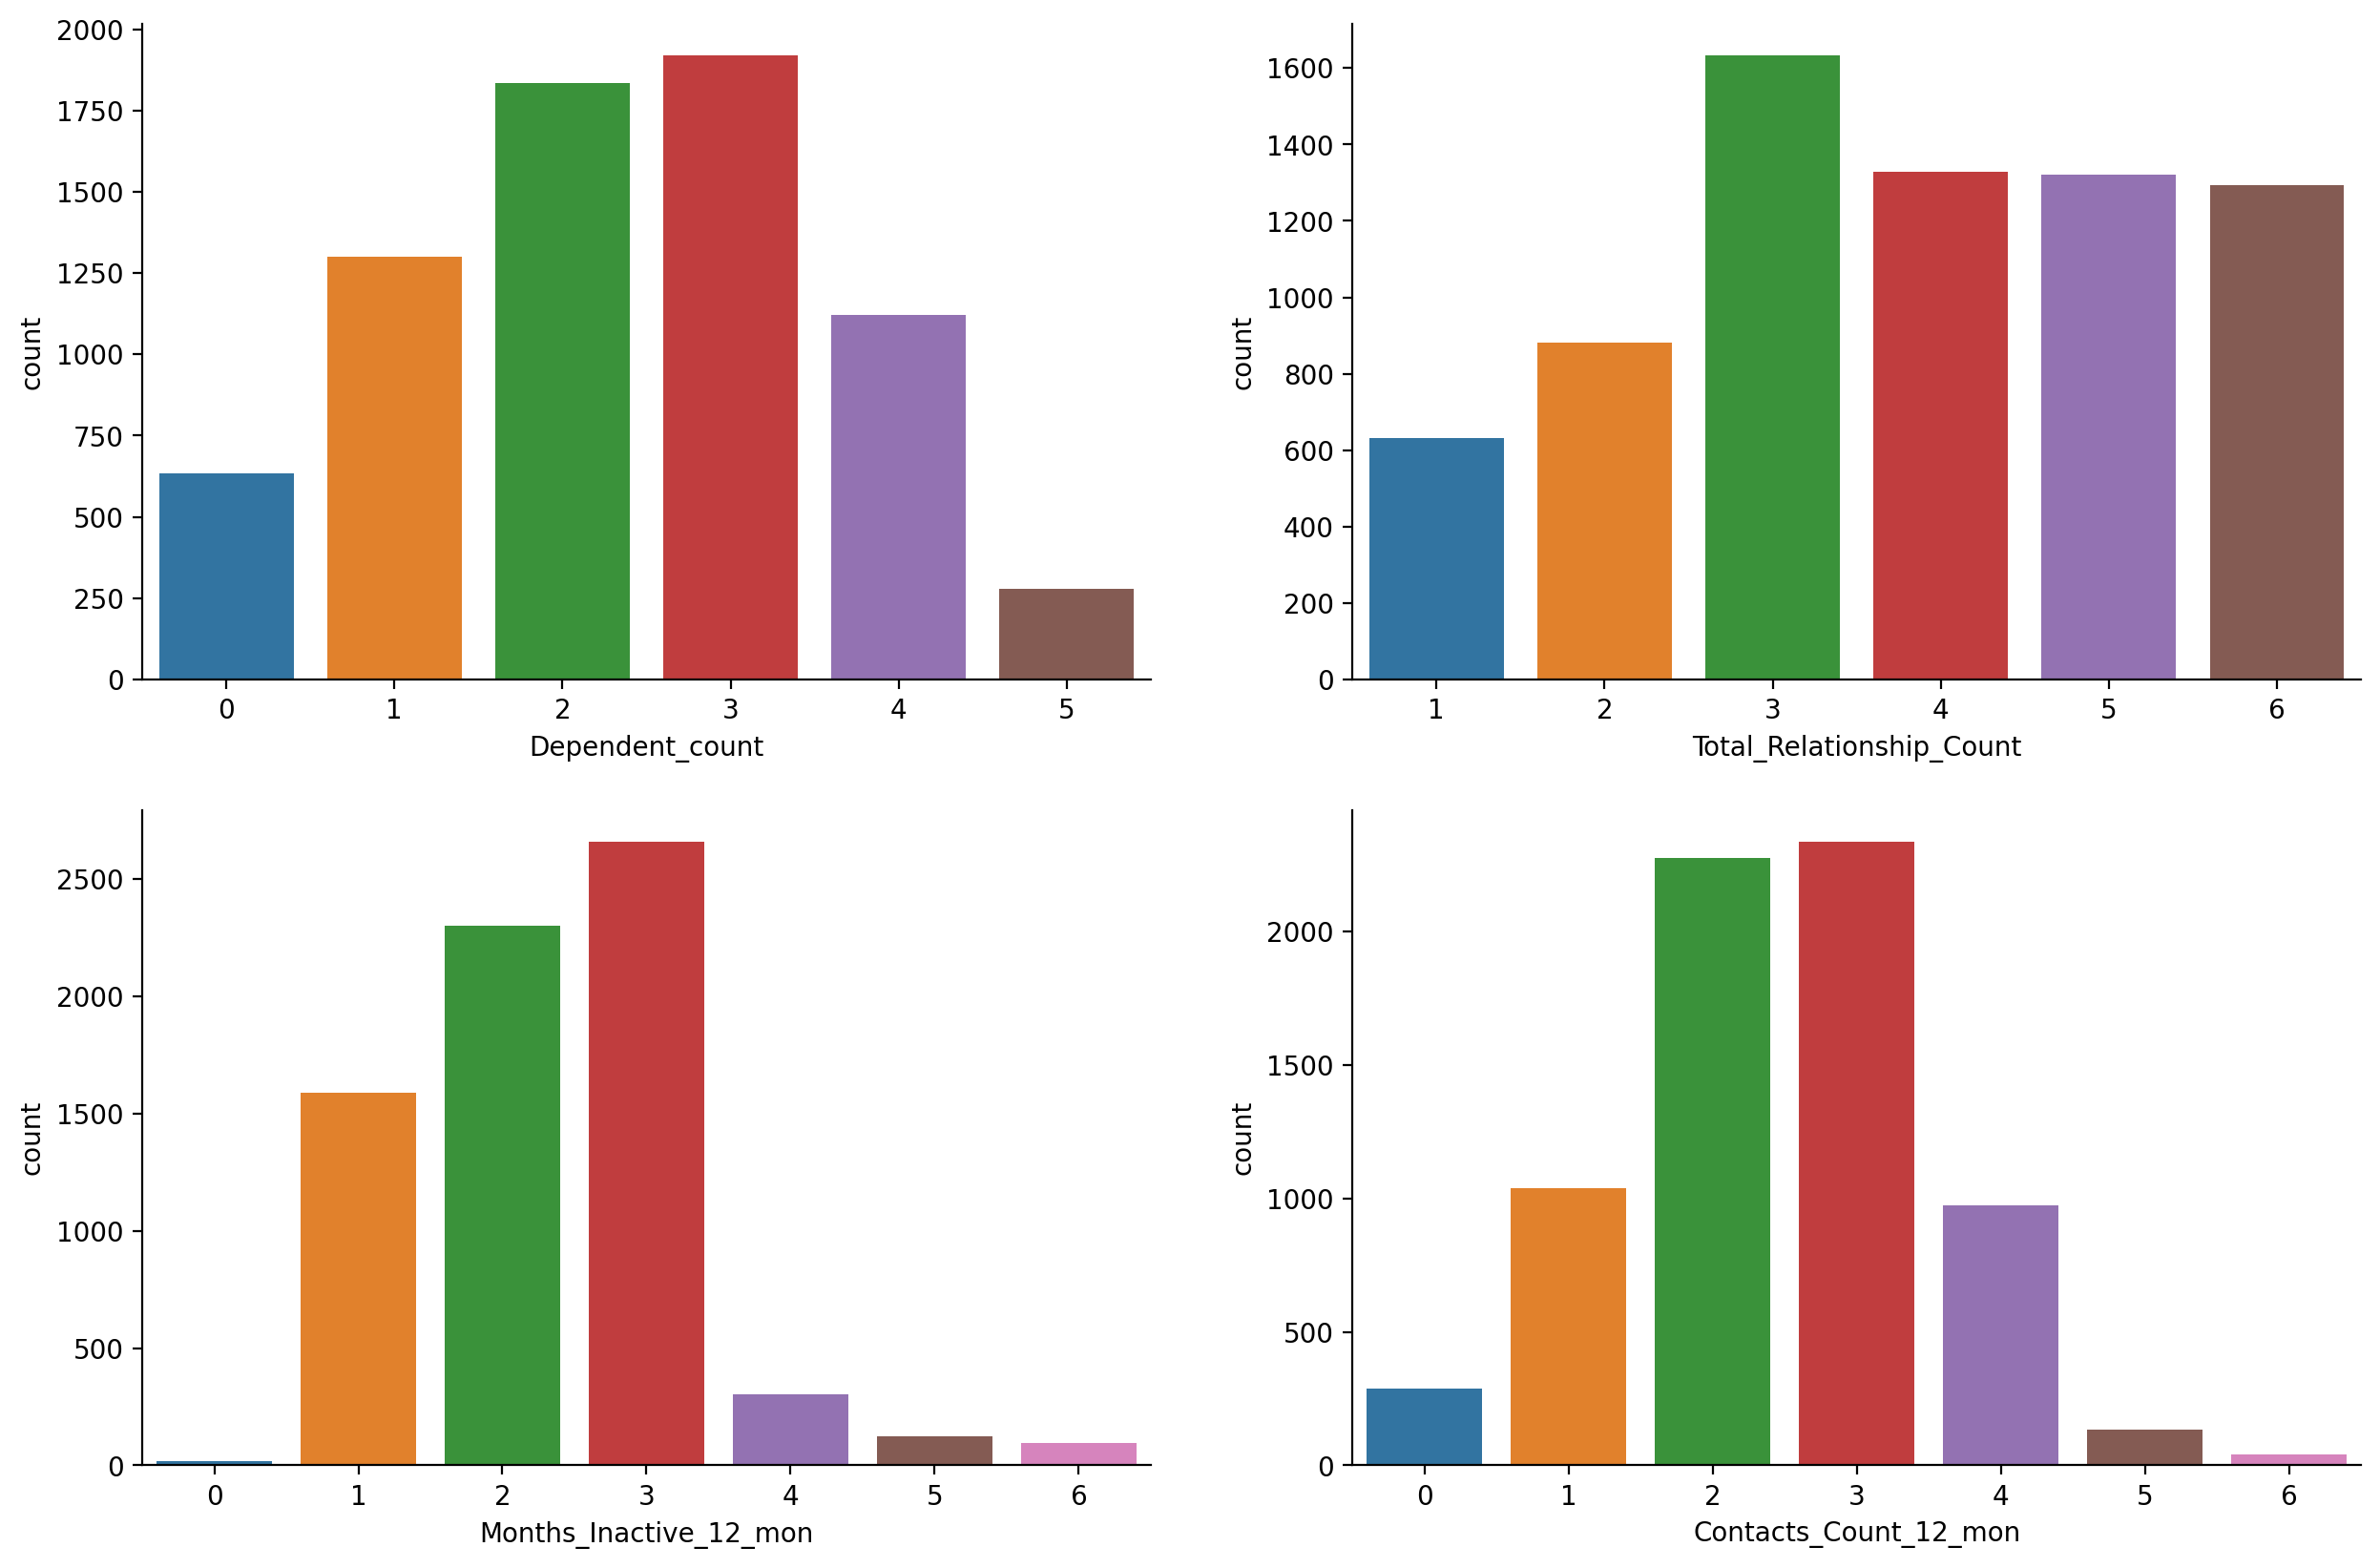

In [15]:
plt.figure(figsize=(15,10), dpi=200)
for num, name in enumerate(discrete):
    plt.subplot(2,2,num+1)
    sns.countplot(x=name, data=X_train)
    sns.despine()

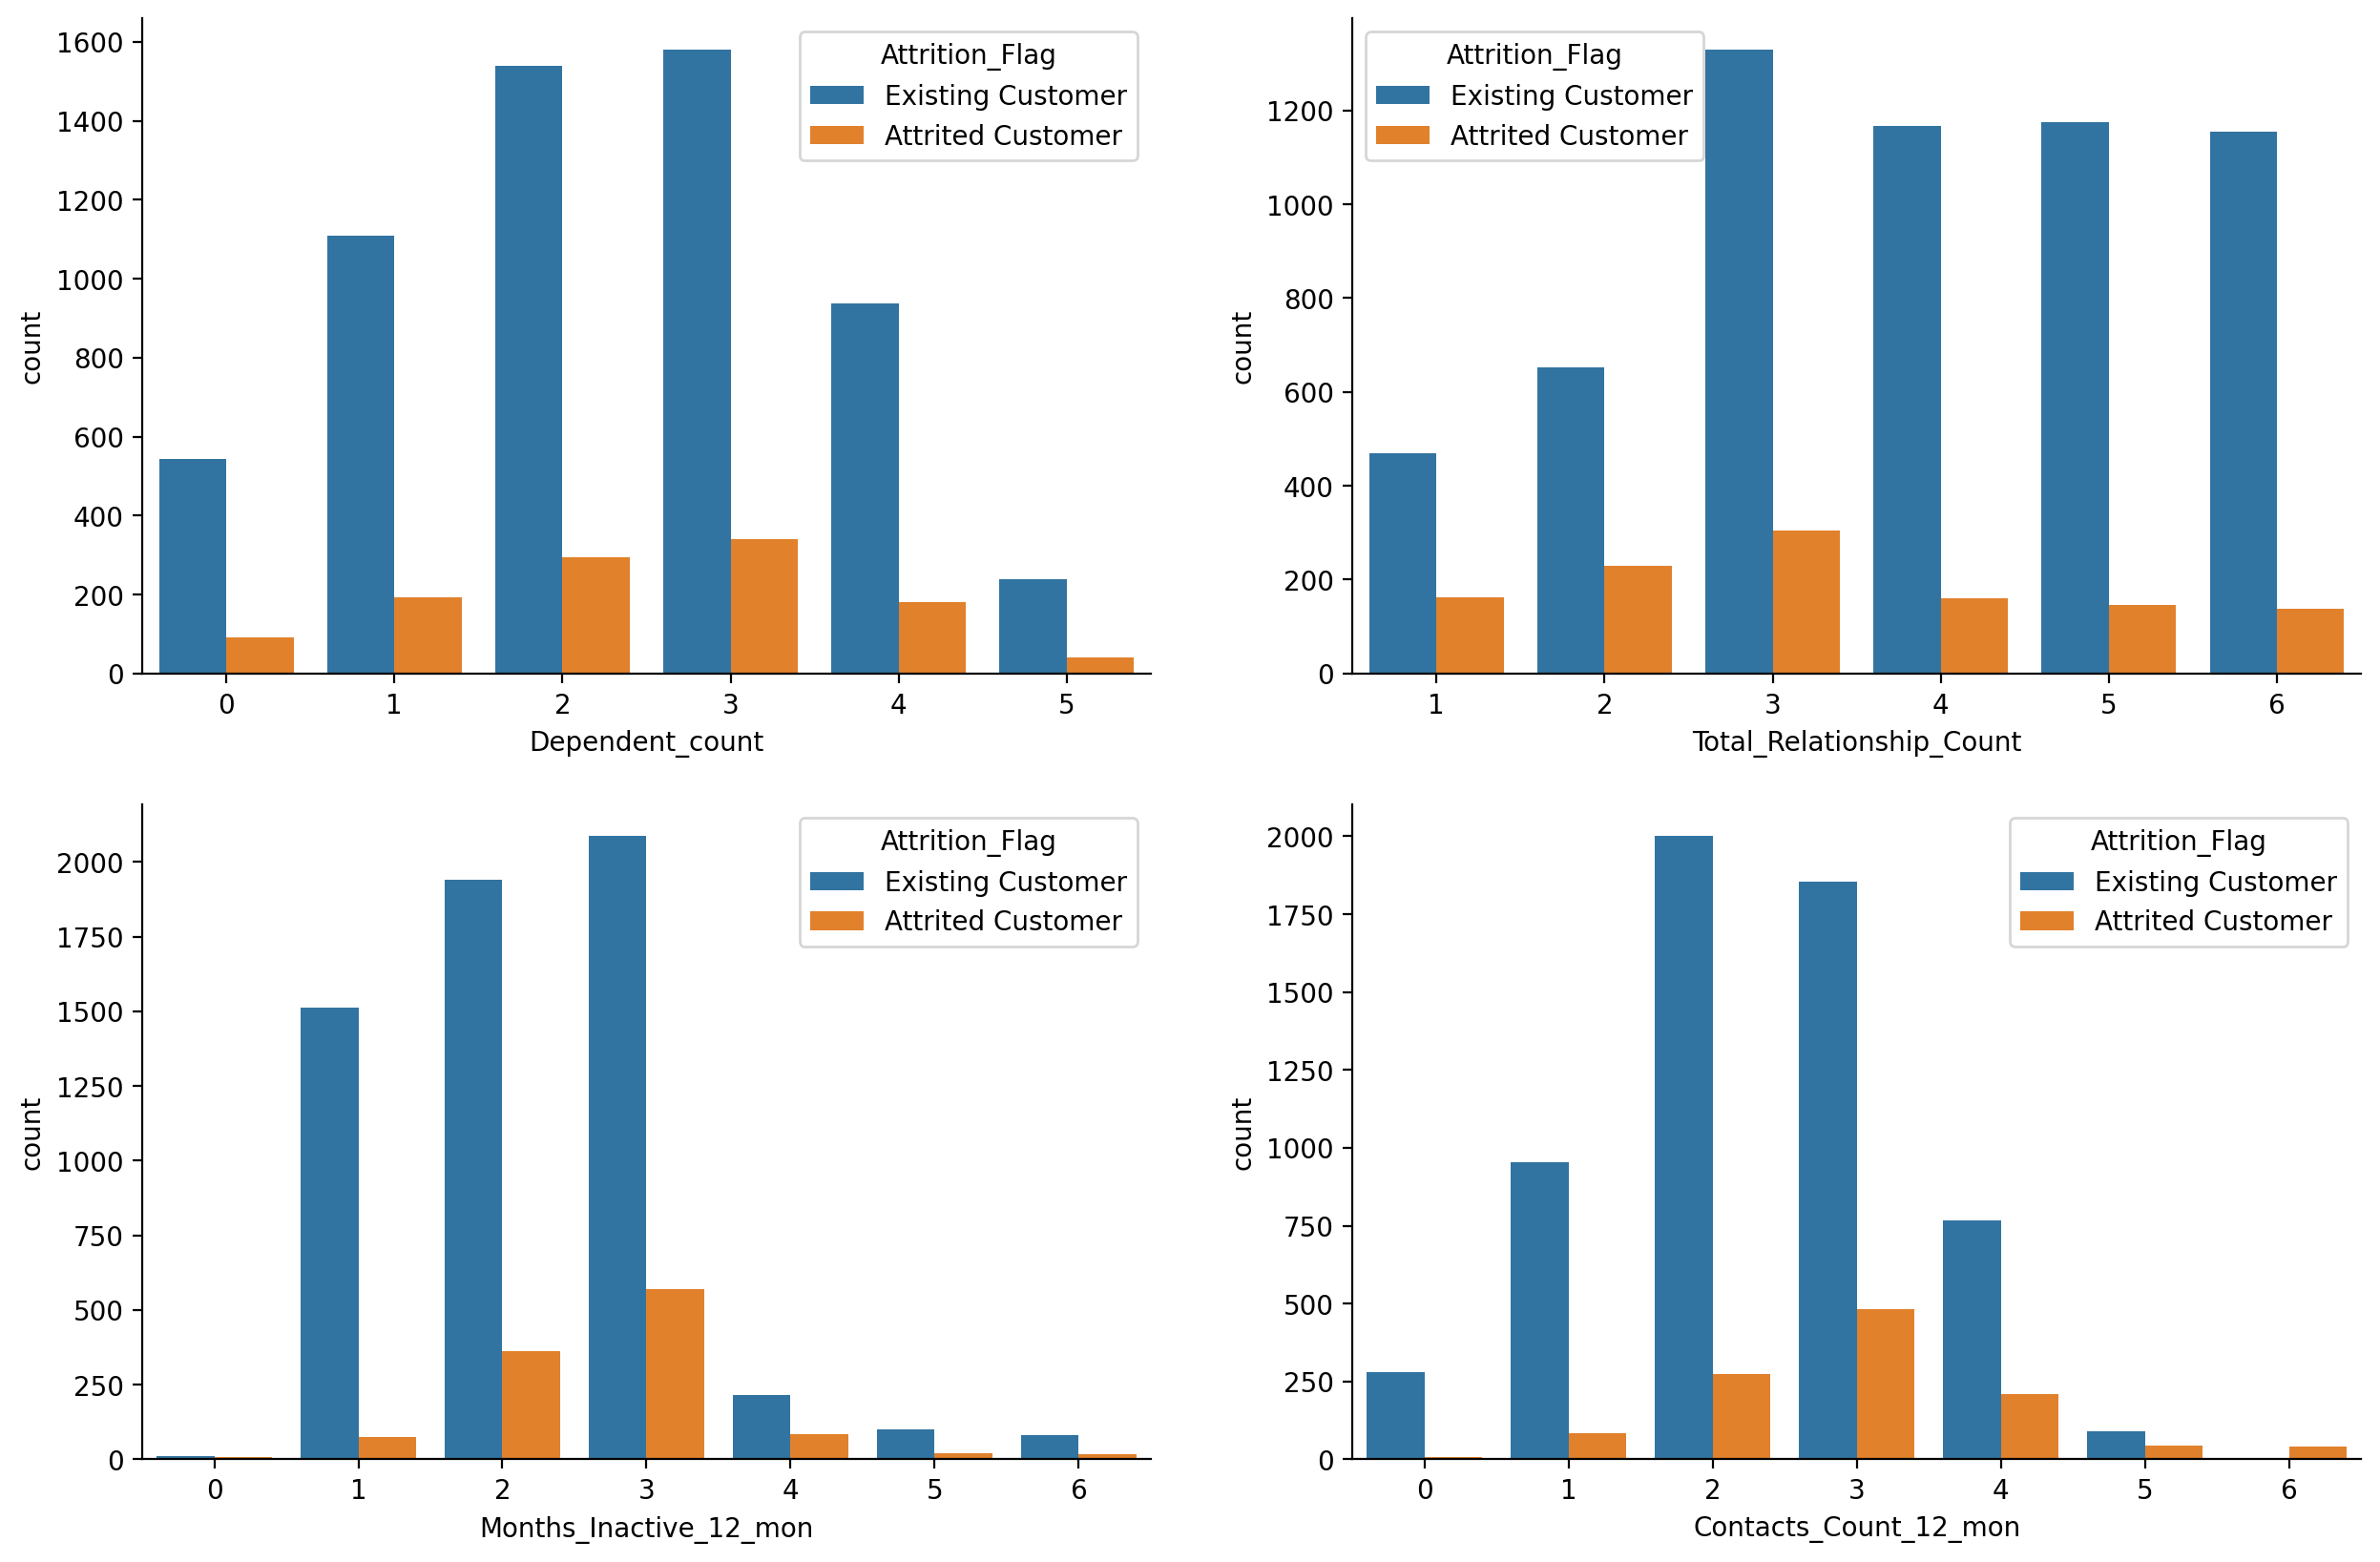

In [16]:
plt.figure(figsize=(15,10), dpi=200)
for num, name in enumerate(discrete):
    plt.subplot(2,2,num+1)
    sns.countplot(x=X_train[name], hue=y_train, dodge=True)
    sns.despine()

### Continuous

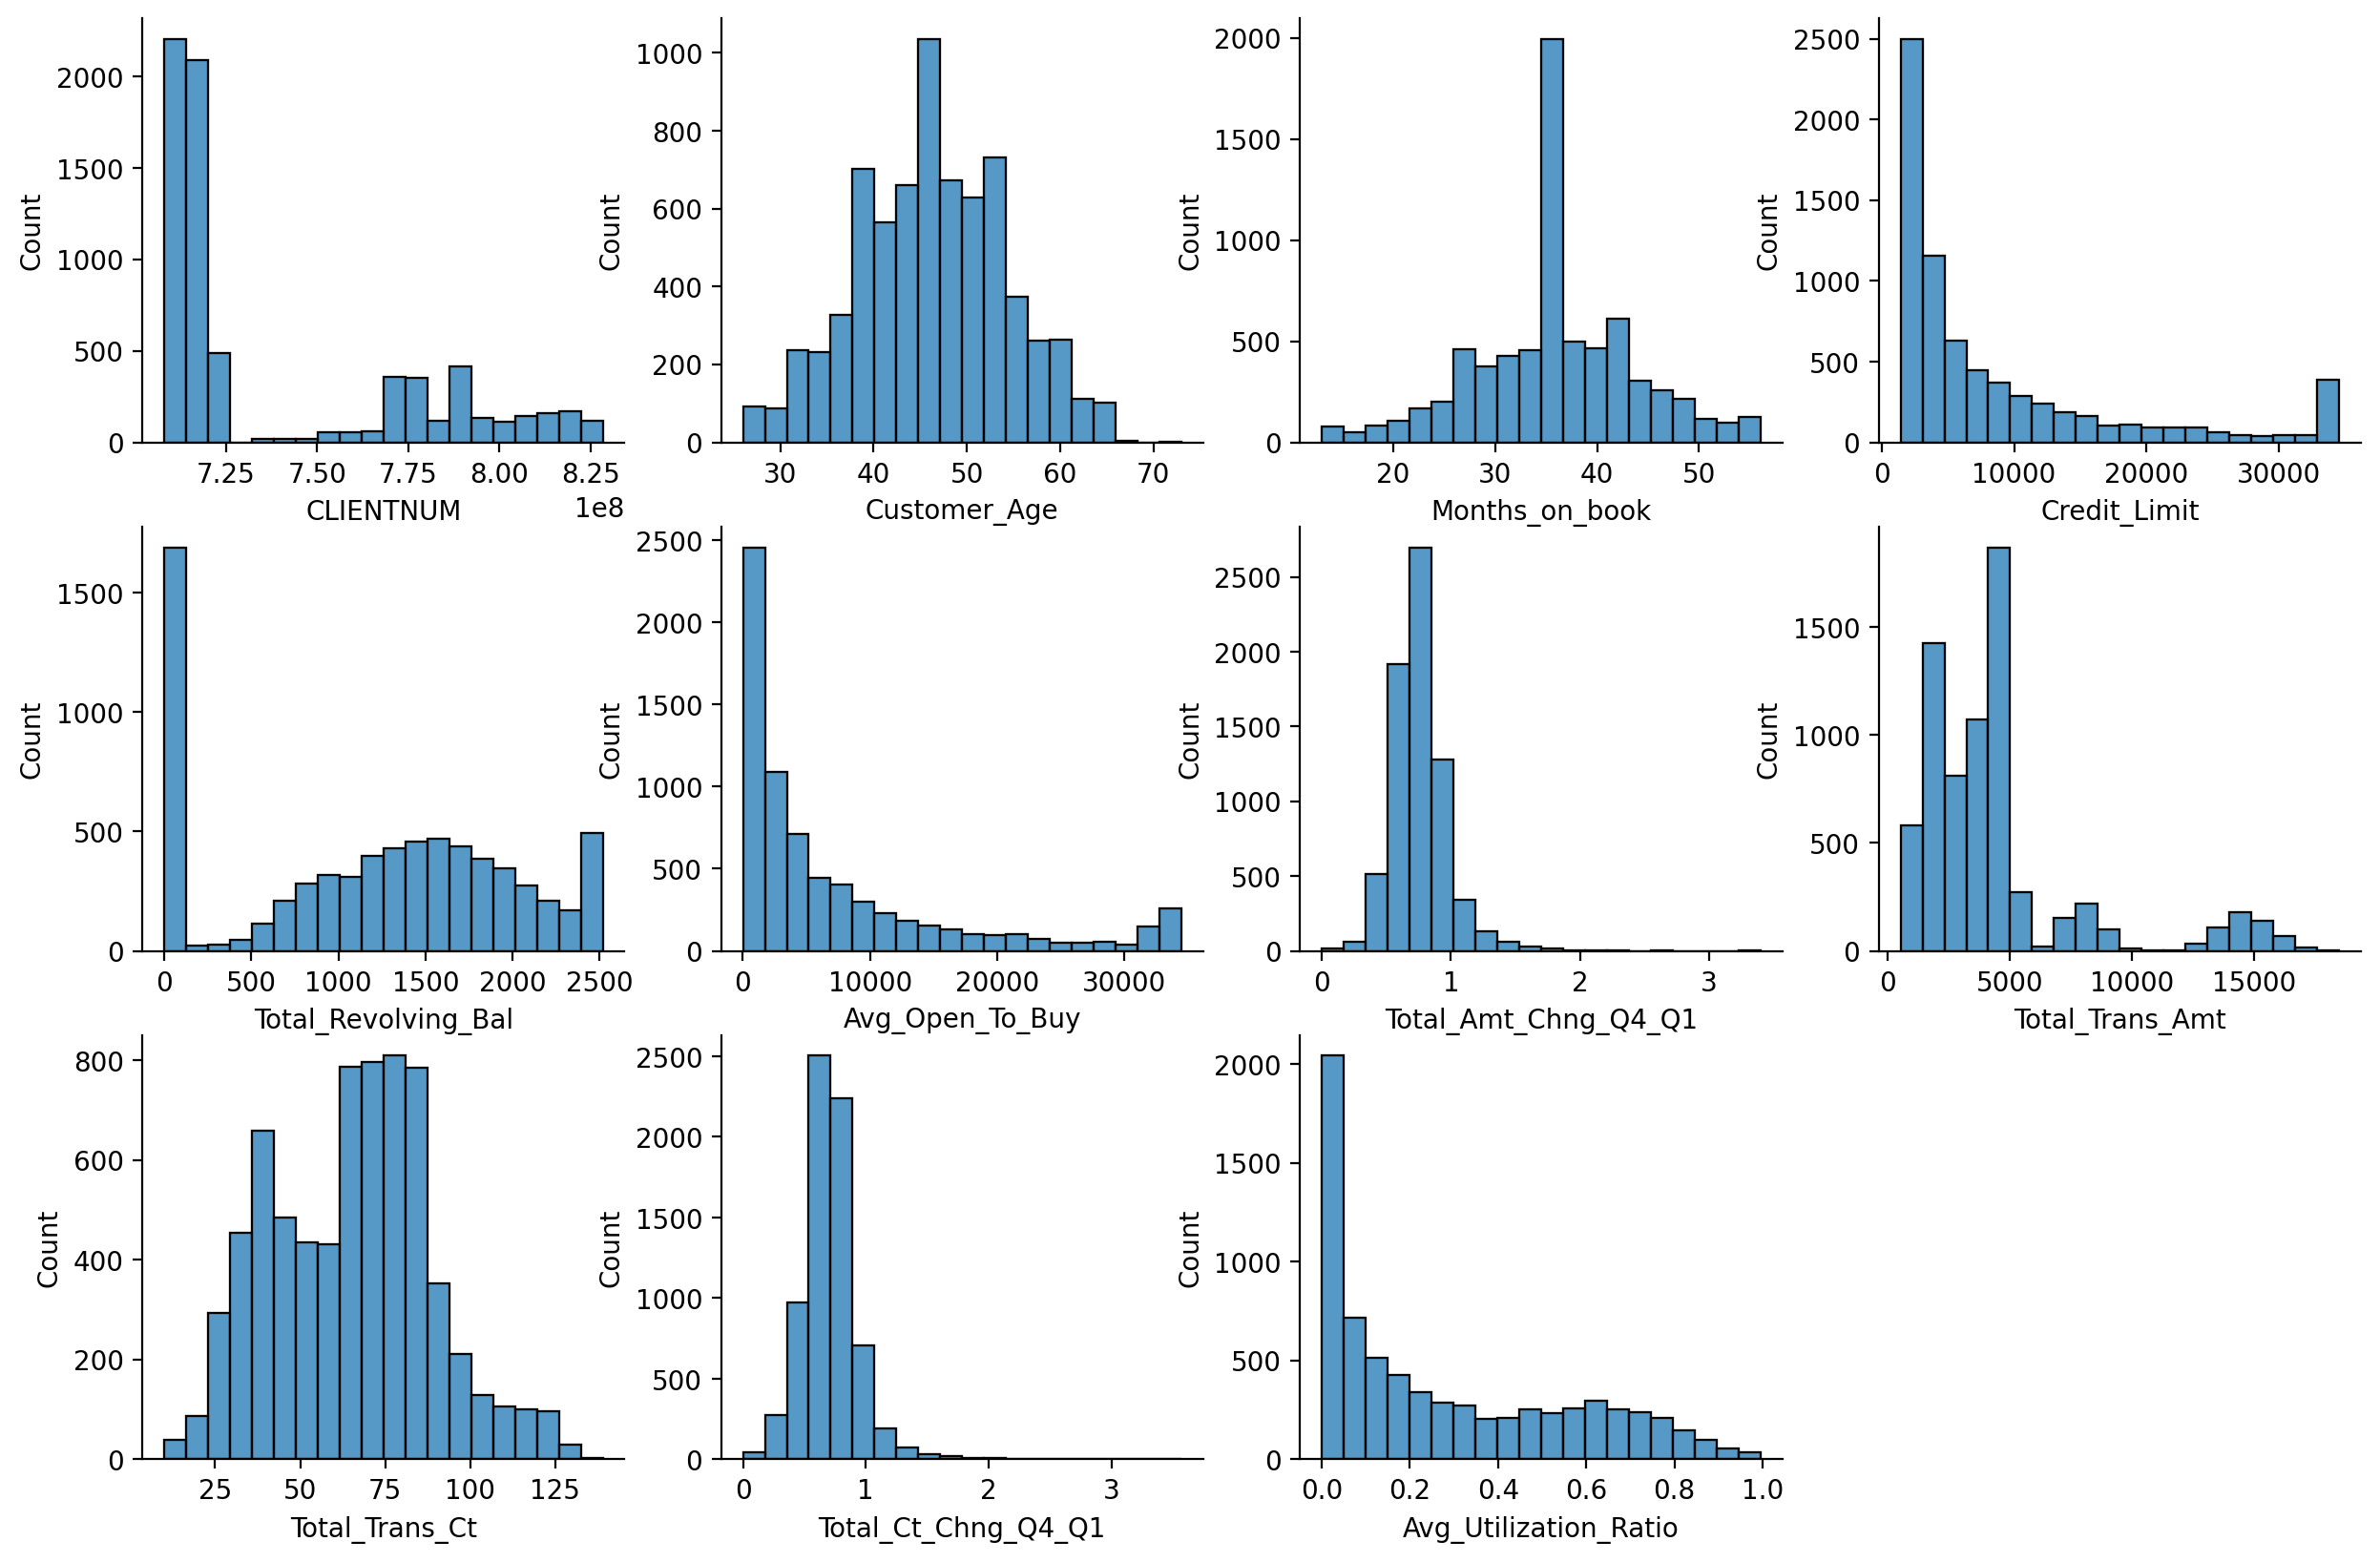

In [17]:
plt.figure(figsize=(15,10), dpi=200)
for num, name in enumerate(continuous):
    plt.subplot(3, 4, num+1)
    sns.histplot(X_train[name], bins=20)
    sns.despine()

In [18]:
yData = pd.DataFrame(y_train)

In [19]:
y_train[y_train=='Existing Customer']

2037    Existing Customer
5129    Existing Customer
3745    Existing Customer
1269    Existing Customer
5793    Existing Customer
              ...        
5684    Existing Customer
835     Existing Customer
2141    Existing Customer
6119    Existing Customer
660     Existing Customer
Name: Attrition_Flag, Length: 5948, dtype: object

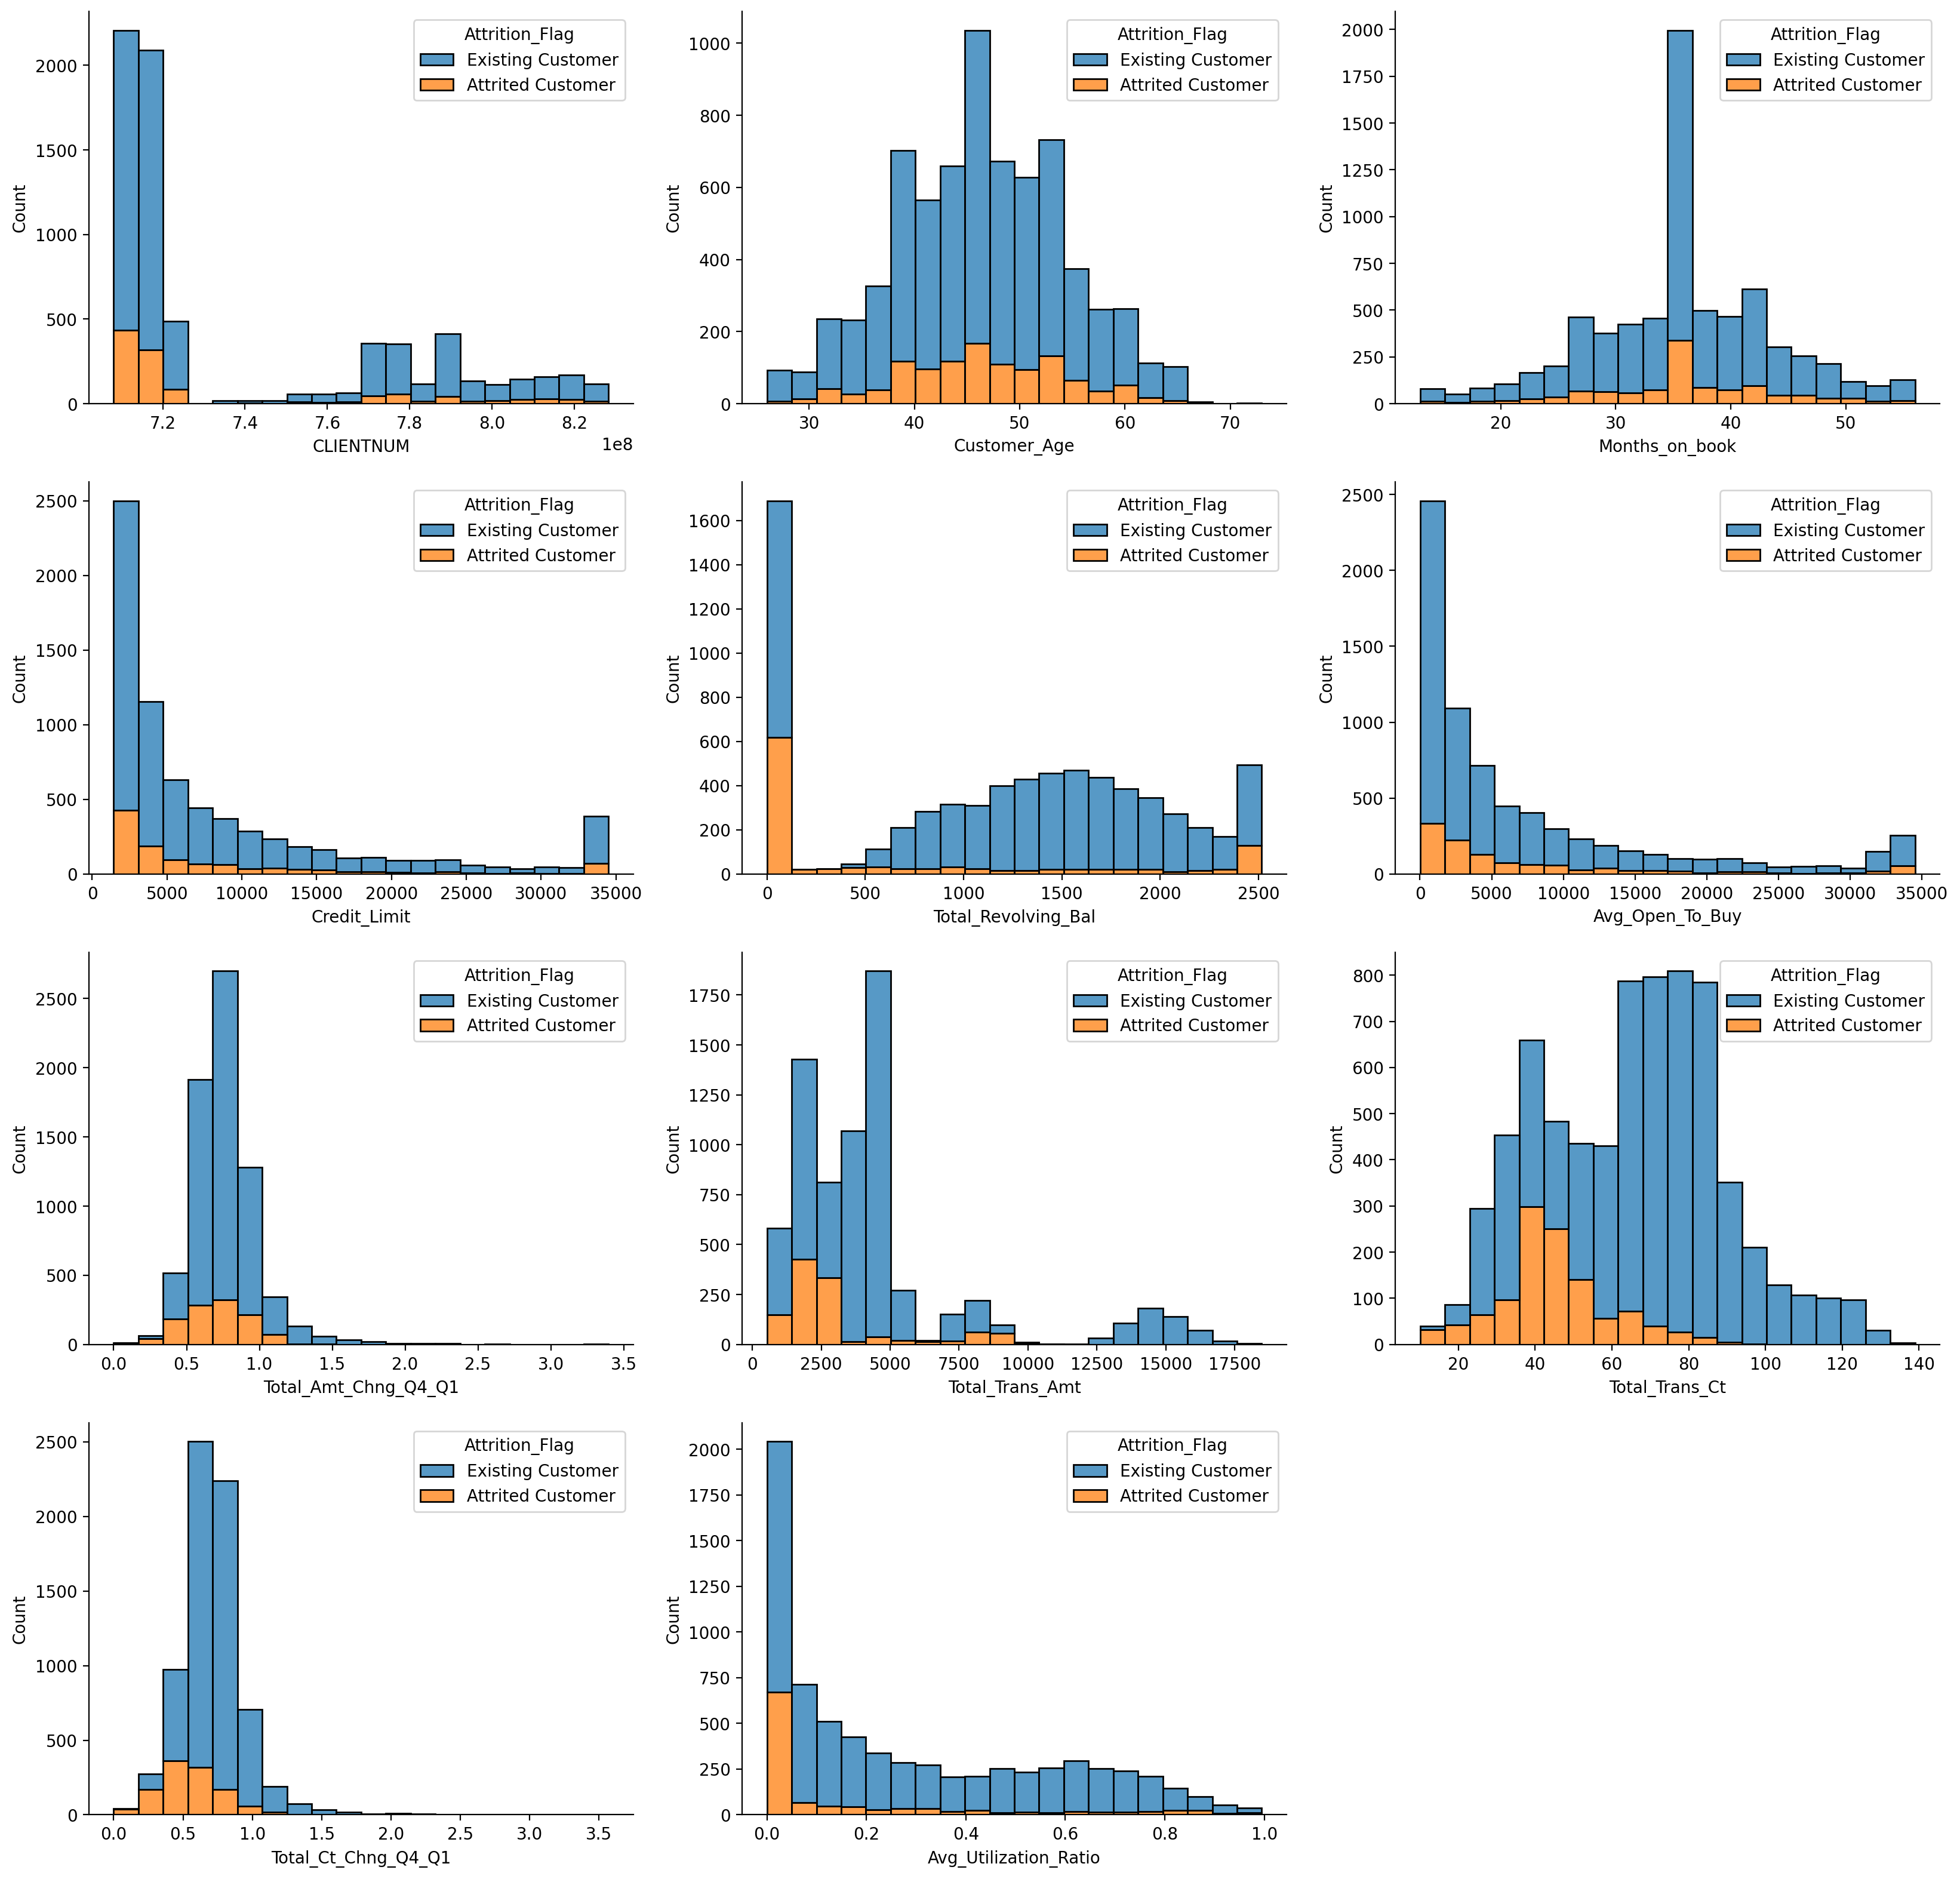

In [20]:
plt.figure(figsize=(20,20), dpi=200)
for num, name in enumerate(continuous):
    plt.subplot(4, 3, num+1)
    #sns.barplot(x= y_train, y=X_train[name])
    sns.histplot(x=X_train[name], hue=y_train, bins=20, multiple='stack')
    #sns.histplot(x=X_train[name], hue=y_train[y_train=='Attrited Customer'])
    sns.despine()

### Categorical

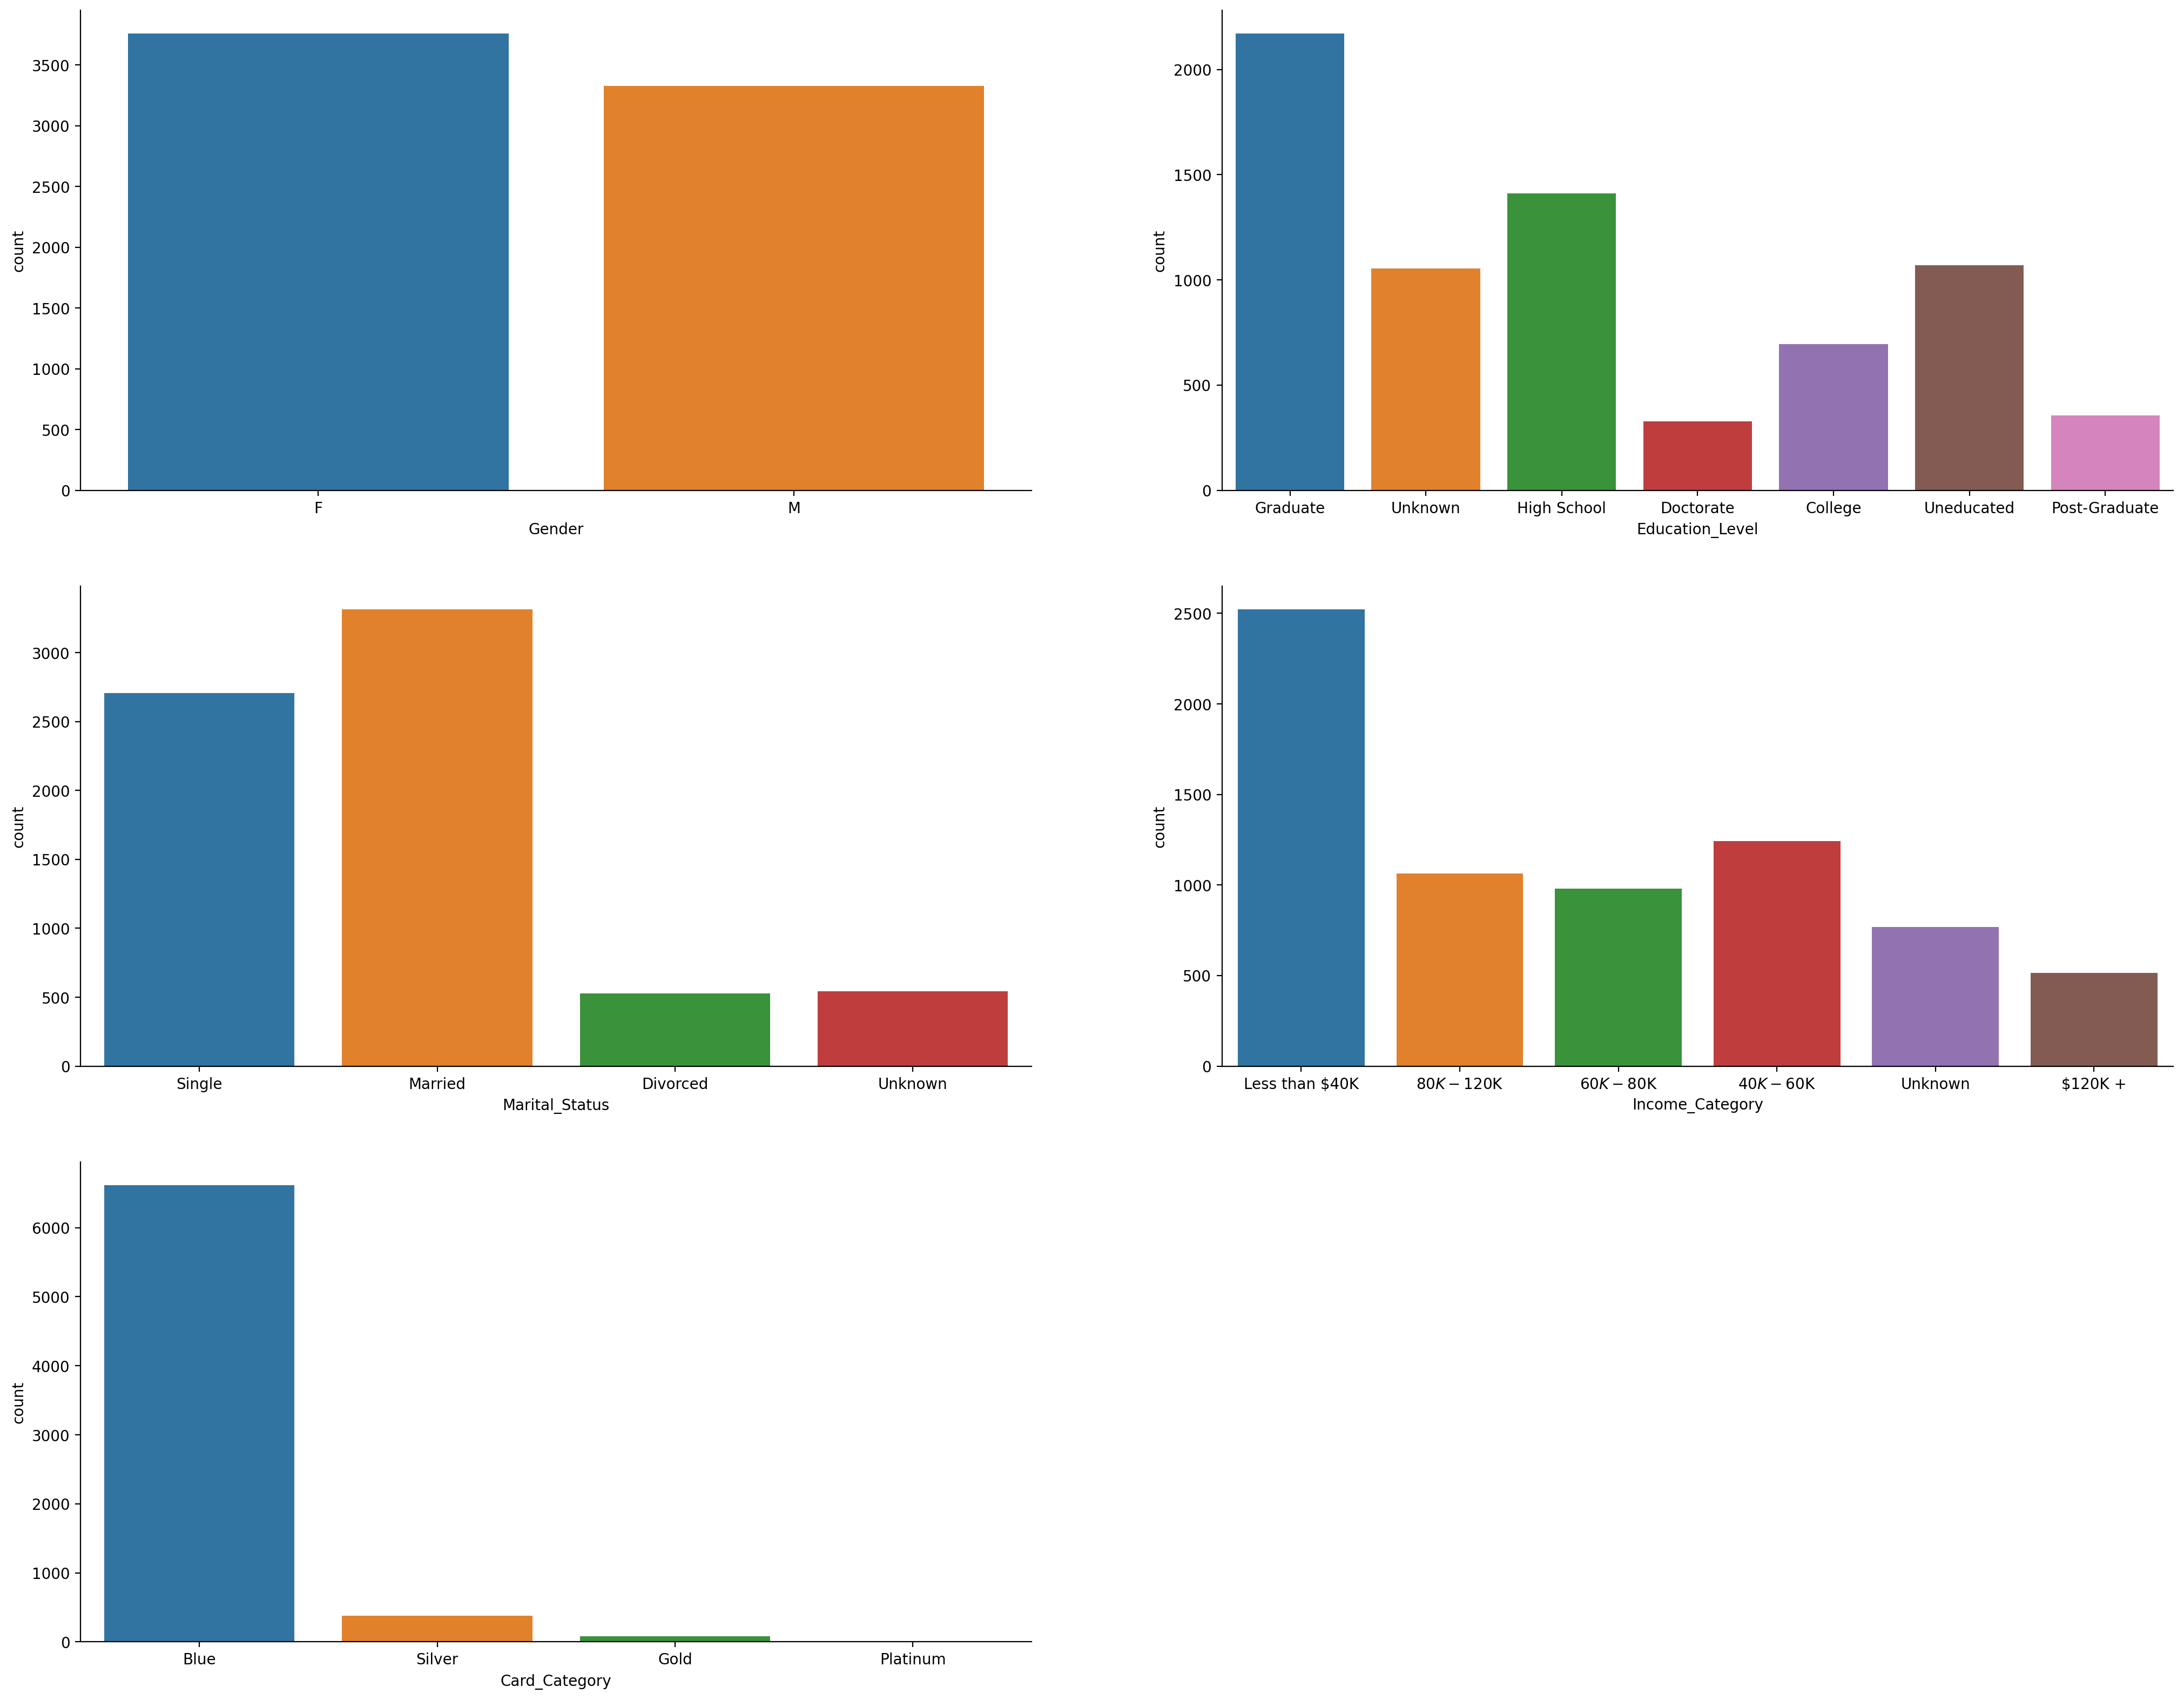

In [21]:
plt.figure(figsize=(25,20), dpi=200)
for num, name in enumerate(categorical):
    plt.subplot(3,2,num+1)
    sns.countplot(x=X_train[name])
    #plt.xticks(rotation = 45)
    sns.despine()

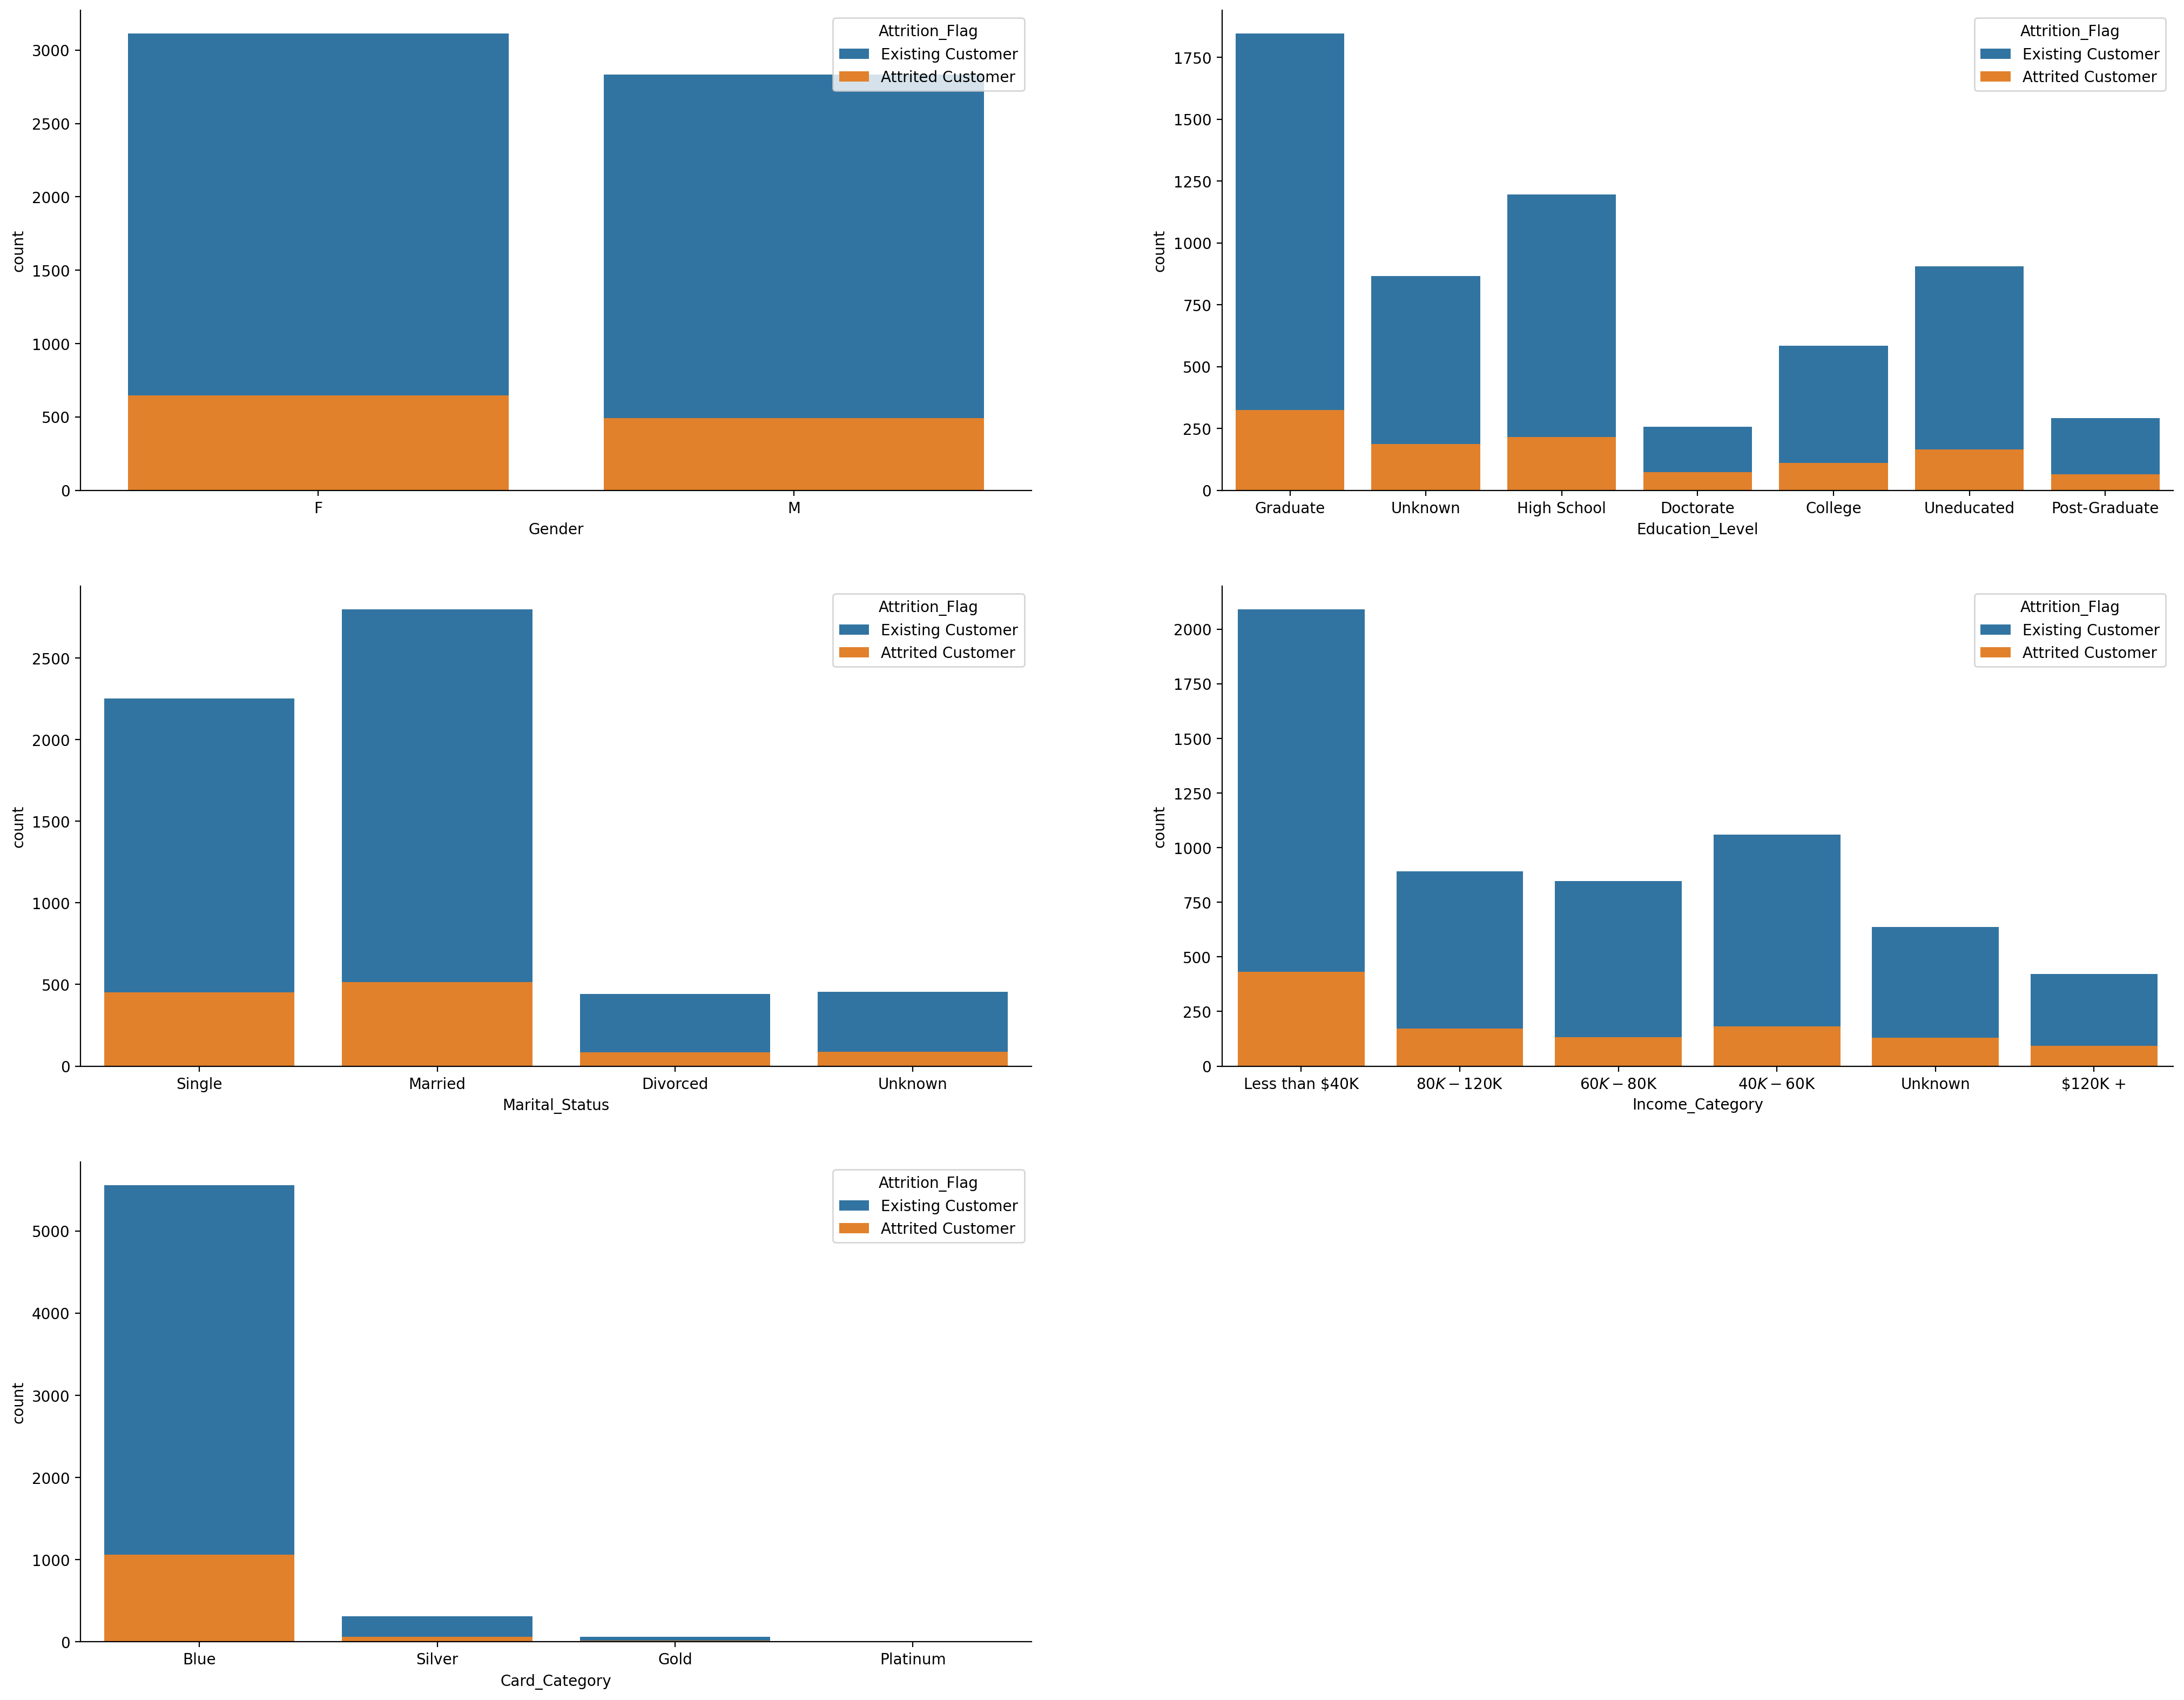

In [22]:
plt.figure(figsize=(25,20), dpi=200)
for num, name in enumerate(categorical):
    plt.subplot(3,2,num+1)
    sns.countplot(x=X_train[name], hue=y_train, dodge=False)
    sns.despine()

### Target Variable

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

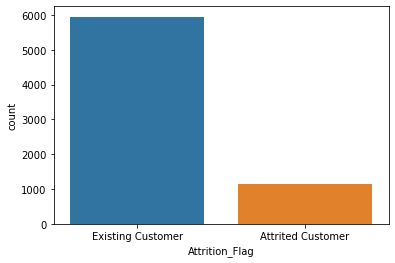

In [23]:
sns.countplot(x=y_train)

In [24]:
y_train.value_counts(normalize=True)

Existing Customer    0.839165
Attrited Customer    0.160835
Name: Attrition_Flag, dtype: float64

# Data Preprocessing

In [25]:
for i in categorical:
    print(f'{i}:\n{X_train[i].unique()}\n')
    print()

Gender:
['F' 'M']

Education_Level:
['Graduate' 'Unknown' 'High School' 'Doctorate' 'College' 'Uneducated'
 'Post-Graduate']

Marital_Status:
['Single' 'Married' 'Divorced' 'Unknown']

Income_Category:
['Less than $40K' '$80K - $120K' '$60K - $80K' '$40K - $60K' 'Unknown'
 '$120K +']

Card_Category:
['Blue' 'Silver' 'Gold' 'Platinum']



## Ordinal Encoding

In [89]:
education = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
income = ['Unknown', 'Less than $40K', '$40K - $60K','$60K - $80K', '$80K - $120K', '$120K +']

In [90]:
numerical = (continuous[1:]+ discrete)

## Create Pipeline

In [112]:
pp_num = make_pipeline(StandardScaler())

pp_ohe = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

pp_ordinal_encorder = make_pipeline(OrdinalEncoder(categories=[education, income]), 
                                   StandardScaler())


In [122]:
le = LabelEncoder()

In [124]:
y_transformed_train = le.fit_transform(y_train)

In [126]:
y_transformed_test = le.transform(y_test)

In [133]:
ct = make_column_transformer(
    ('drop', ['CLIENTNUM']),
    (pp_ohe, ['Gender', 'Marital_Status', 'Card_Category']),
    (pp_ordinal_encorder, ['Education_Level', 'Income_Category']), 
    (pp_num, numerical),
    remainder='drop')

# Model Building

In [134]:
model = RandomForestClassifier()

In [135]:
pipe = make_pipeline(ct,  model)

In [136]:
pipe.fit(X_train, y_transformed_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('drop', 'drop',
                                                  ['CLIENTNUM']),
                                                 ('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Marital_Status',
                                                   'Card_Category']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Unknown',
                                                                                               'Uneducated',
                                                           

# Model Evaluation

In [138]:
cross_val_score(pipe, X_train, y_transformed_train, cv=5, scoring='f1').mean()

0.9749034605902288

In [140]:
predictions = pipe.predict(X_test)

In [141]:
print(classification_report(y_transformed_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       487
           1       0.97      0.99      0.98      2552

    accuracy                           0.96      3039
   macro avg       0.94      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

